In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

# Phân loại với SVM tuyến tính

In [2]:
iris_data = load_iris()

In [3]:
X = iris_data['data'][:,2:]
y = iris_data['target']

setosa_or_versi = (y == 1) | (y == 0)

X = X[setosa_or_versi]
y = y[setosa_or_versi]

In [4]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
x0 = np.linspace(0,6,300)
pred_1 = 5*x0 - 20
pred_2 = x0- 1.8
pred_3 = 0.1*x0 + 0.5

In [6]:
svm = SVC(kernel = 'linear',C=float("inf"))
svm.fit(X,y)

SVC(C=inf, kernel='linear')

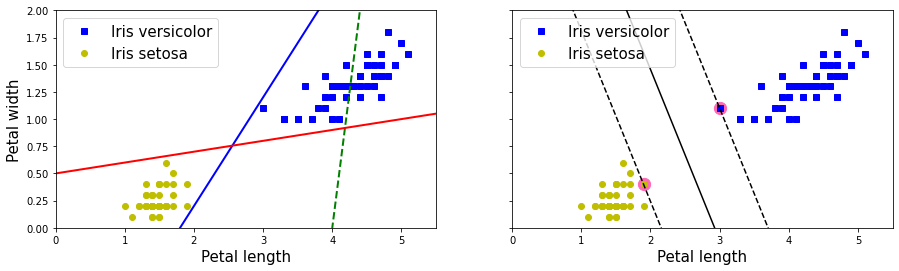

In [7]:
def plot_svm_boundary(svm,xmin = 0,xmax = 6):
    w = svm.coef_[0]
    b = svm.intercept_[0]

    x0 = np.linspace(xmin,xmax,300)
    # w[0] : x
    # w0x0 + w1x1 + b = 0 => x1 = -w0/w1 * x0 - b/w1
    boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = boundary + margin
    gutter_down = boundary - margin

    svt = svm.support_vectors_
    plt.scatter(x = svt[:,0],y = svt[:,1],s = 150,color = 'hotpink')
    plt.plot(x0,boundary,'k-')
    plt.plot(x0,gutter_up,'k--')
    plt.plot(x0,gutter_down,'k--')

fig, axes = plt.subplots(ncols = 2,figsize = (15,4),sharey= True)

plt.sca(axes[0])
plt.plot(X[:,0][y==1], X[:,1][y==1],'bs',label = 'Iris versicolor')
plt.axis([0, 5.5, 0, 2])
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label = 'Iris setosa')
plt.legend(loc = 'upper left',fontsize = 15)
plt.xlabel("Petal length",fontsize = 15)
plt.ylabel("Petal width",fontsize = 15)
plt.plot(x0,pred_1,'g--',linewidth = 2)
plt.plot(x0,pred_2,'b-',linewidth = 2)
plt.plot(x0,pred_3,'r-',linewidth = 2)

plt.sca(axes[1])
plt.plot(X[:,0][y==1], X[:,1][y==1],'bs',label = 'Iris versicolor')
plt.axis([0, 5.5, 0, 2])
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label = 'Iris setosa')
plt.legend(loc = 'upper left',fontsize = 15)
plt.xlabel("Petal length",fontsize = 15)
plot_svm_boundary(svm)



## Độ nhạy với khoảng giá trị của đặc trưng

In [8]:
Xs = np.array([[3,75],[5,60],[1,50],[5,20]])
ys = np.array([1,1,0,0])

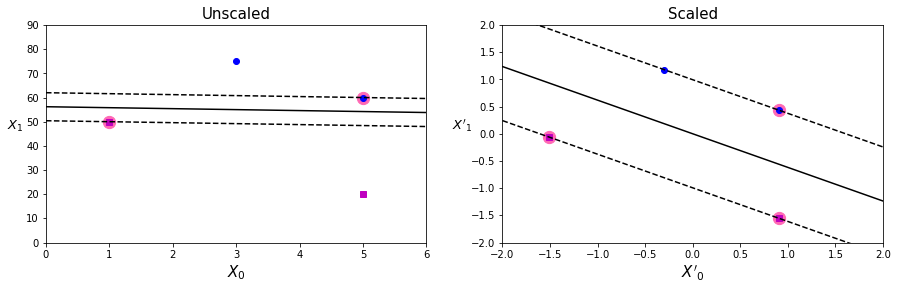

In [9]:
svm_clf = SVC(kernel = 'linear',C=100)
svm_clf.fit(Xs,ys)

fig, axes = plt.subplots(ncols = 2,figsize = (15,4))
plt.sca(axes[0])
plt.title("Unscaled",fontsize = 15)
plt.xlabel("$X_0$",fontsize = 15)
plt.ylabel("$X_1$\t ",fontsize = 13,rotation = 0)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], 'bo')
plt.plot(Xs[:,0][ys == 0],Xs[:,1][ys == 0], 'ms')
plt.axis([0, 6, 0, 90])
plot_svm_boundary(svm_clf)

plt.sca(axes[1])
std_scale = StandardScaler()
x_scale = std_scale.fit_transform(Xs)
svm_clf.fit(x_scale,ys)
plt.title("Scaled",fontsize = 15)
plt.xlabel("$X'_0$",fontsize = 15)
plt.ylabel("$X'_1$\t ",fontsize = 13,rotation = 0)
plt.plot(x_scale[:,0][ys == 1],x_scale[:,1][ys == 1], 'bo')
plt.plot(x_scale[:,0][ys == 0],x_scale[:,1][ys == 0], 'ms')
plt.axis([-2, 2, -2, 2])
plot_svm_boundary(svm_clf,-2,2)

`Các mô hình SVM khá nhạy cảm với khoảng giá trị của đặc trưng`

## Phân loại biên mềm

Nếu ta bắt buộc các mẫu phải nằm ngoài con đường và ở đúng phía thì thuật toán này được gọi là phân loại biên cứng:
* Chỉ hoạt động khi dữ liệu có tính tách biệt tuyến tính
* Nhạy cảm với các điểm ngoại lai

In [10]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

(0.5, 5.0, 0.0, 2.0)

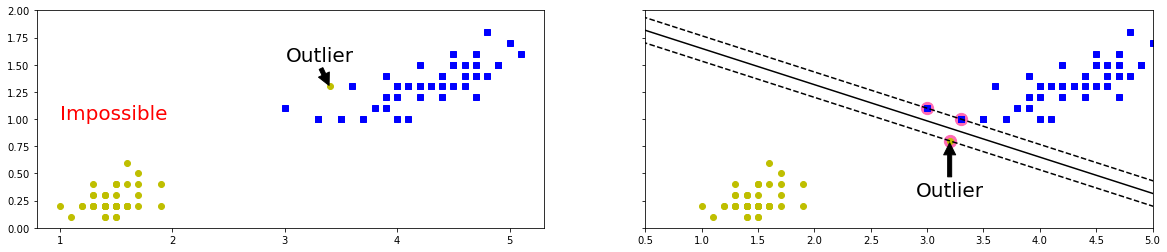

In [11]:
fig,axes = plt.subplots(ncols = 2,sharey=True,figsize = (20,4))

plt.sca(axes[0])
x_new = np.r_[X,[X_outliers[0]]]
y_new = np.r_[y,[y_outliers[0]]]
plt.plot(x_new[:,0][y_new == 0],x_new[:,1][y_new == 0],'yo')
plt.plot(x_new[:,0][y_new == 1],x_new[:,1][y_new == 1],'bs')
plt.annotate("Outlier",xy = X_outliers[0], xycoords = "data",
            arrowprops=dict(facecolor='black', shrink=0.05),textcoords='offset points',xytext=(-10,40),
            horizontalalignment='center', verticalalignment='top',ha = 'center',fontsize = 20)
plt.text(1,1,"Impossible",fontsize = 20,color = 'red')

plt.sca(axes[1])
x_new = np.r_[X,[X_outliers[1]]]
y_new = np.r_[y,[y_outliers[1]]]
plt.plot(x_new[:,0][y_new == 0],x_new[:,1][y_new == 0],'yo')
plt.plot(x_new[:,0][y_new == 1],x_new[:,1][y_new == 1],'bs')
plt.annotate("Outlier",xy = X_outliers[1], xycoords = "data",
            arrowprops=dict(facecolor='black', shrink=0.05),textcoords='offset points',xytext=(0,-40),
            horizontalalignment='center', verticalalignment='top',ha = 'center',fontsize = 20)
svm_clf = SVC(kernel = "linear",C=10**9)
svm_clf.fit(x_new,y_new)
plot_svm_boundary(svm_clf,0,6)
plt.axis([0.5,5,0,2])

Để tránh vấn đề trên, ta sẽ sử dụng một mô hình linh hoạt hơn. Mục tiêu là tìm ra sự cân bằng giữa độ rộng của con đường càng lớn càng tốt nhưng đồng thời hạn chế `vi phạm biên`. Thuật toán này được gọi là phân loại biên mềm

In [12]:
X = iris_data["data"][:,2:]  # petal length, petal width
y = iris_data["target"] == 2  # Iris virginica


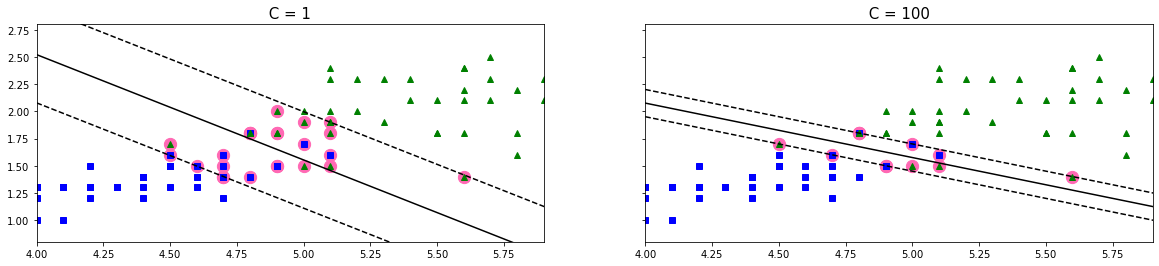

In [13]:
fig,axes = plt.subplots(ncols = 2,sharey = True,figsize = (20,4))

svc = SVC(kernel = 'linear',C=1)
svc.fit(X,y)
plt.sca(axes[0])
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.axis([4, 5.9, 0.8, 2.8])
plt.title(" C = 1 ", fontsize = 15)
plot_svm_boundary(svc,4,6)

svc = SVC(kernel = 'linear',C=100)
svc.fit(X,y)
plt.sca(axes[1])
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.title(" C = 100 ", fontsize = 15)
plt.axis([4, 5.9, 0.8, 2.8])
plot_svm_boundary(svc,4,6)

# Phân loại SVM phi tuyến 

* Mặc dù nhiều bộ phân loại SVM tuyến tính có hiệu năng cao và hoạt động tốt trong nhiều trường hợp nhưng rất nhiều tập dữ liệu lại không có tính `tách biệt tuyến tính`
* Một hướng tiếp cận để xử lí các tập dữ liệu phi tuyến là sử dụng thêm đặc trưng, ví dụ như các đặc trưng đa thức.

In [14]:
x1 = np.linspace(-4,4,9).reshape(-1,1)
y = np.array([1,1,0,0,0,0,0,1,1])
x1_p = np.c_[x1,x1**2]

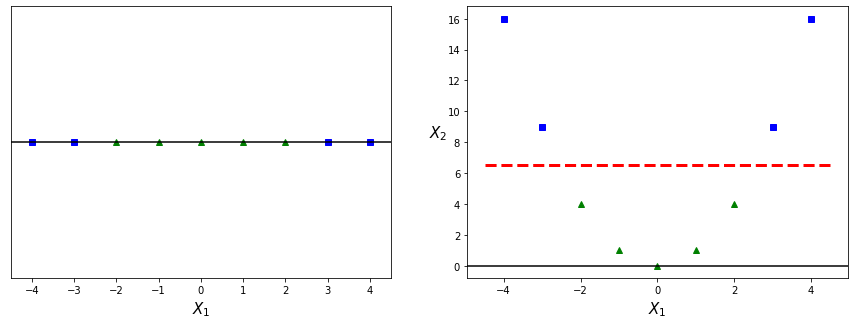

In [15]:
fig,axes = plt.subplots(ncols = 2,figsize = (15,5))

plt.sca(axes[0])
plt.plot(x1[:][y==1],np.zeros(4),'bs')
plt.plot(x1[:][y==0],np.zeros(5),'g^')
plt.axhline(y=0,color = 'k')
plt.axis([-4.5, 4.5, -0.2, 0.2])
ax = plt.gca() #get current axis
ax.get_yaxis().set_visible(False)
plt.xlabel("$X_1$",fontsize = 15)

plt.sca(axes[1])
plt.plot(x1_p[:,0][y==1],x1_p[:,1][y==1],'bs')
plt.plot(x1_p[:,0][y==0],x1_p[:,1][y==0],'g^')
plt.axhline(y=0,color = 'k')
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$X_2$   ",fontsize = 15,rotation = 0)
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)


In [16]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=100,noise = 0.15,random_state=42)

In [62]:
svm_clf = Pipeline([
    ("poly",PolynomialFeatures(degree = 3)),
    ("scale",StandardScaler()),
    ("svm_clf",LinearSVC(loss = 'hinge', C = 10))
])
svm_clf.fit(x,y)

C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scale', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [60]:
def plot_contour(svm,axis):
    x1s = np.linspace(axis[0],axis[1],100)
    x2s = np.linspace(axis[2],axis[3],100)
    x1,x2 = np.meshgrid(x1s,x2s) # 
    X = np.c_[x1.ravel(),x2.ravel()]
    y_pred = svm.predict(X).reshape(x1.shape)
    y_decision = svm.decision_function(X).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,cmap=plt.cm.brg,alpha = 0.2)
    plt.contourf(x1,x2,y_decision,cmap=plt.cm.brg, alpha = 0.1)


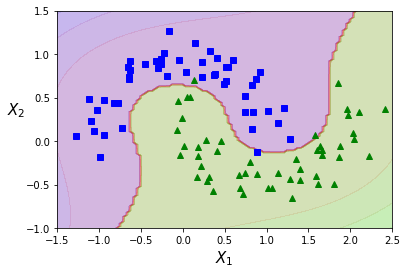

In [61]:
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$X_2$   ",fontsize = 15,rotation = 0)
plt.axis([-1.5,2.5,-1,1.5])
plot_contour(svm_clf,[-1.5,2.5,-1,1.5])

## Hạt nhân đa thức

Khi dùng mô hình SVM ta có thể áp dụng `kernel trick` giúp ta đạt kết quả tương tự như khi thêm một số lượng lớn đặc trưng đa thức nhưng lại không thực sự thêm bất kì đặc trưng nào => không có sự bùng nổ tổ hợp các đặc trưng 

In [71]:
poly_kernel_svm_clf_1 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm",SVC(kernel = "poly",degree = 3,coef0 = 1,C = 5))
])
poly_kernel_svm_clf_1.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=1, kernel='poly'))])

In [72]:
poly_kernel_svm_clf_2 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm",SVC(kernel = "poly",degree = 10,coef0 = 100,C = 5))
])
poly_kernel_svm_clf_2.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Siêu tham số `coef0` kiểm soát mức độ mà mô hình bị ảnh hưởng bởi đa thức bậc cao và đa thức bậc thấp 

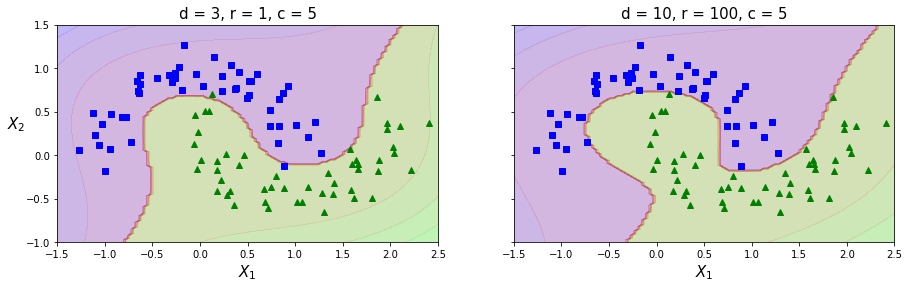

In [77]:
fig,axes = plt.subplots(ncols = 2, figsize = (15,4), sharey = True)
plt.sca(axes[0])
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$X_2$   ",fontsize = 15,rotation = 0)
plt.axis([-1.5,2.5,-1,1.5])
plt.title("d = 3, r = 1, c = 5",fontsize = 15)
plot_contour(poly_kernel_svm_clf_1,[-1.5,2.5,-1,1.5])

plt.sca(axes[1])
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
plt.xlabel("$X_1$",fontsize = 15)
plt.title("d = 10, r = 100, c = 5",fontsize = 15)
plt.axis([-1.5,2.5,-1,1.5])
plot_contour(poly_kernel_svm_clf_2,[-1.5,2.5,-1,1.5])

## Đặc trưng tương tự

$$ \phi_{\gamma}(x,l) = exp( -\gamma||x-l||^2)$$